In [24]:
%load_ext autoreload
%autoreload 2

import numpy as np
import utils
import plots
import envs
import optim
import gym

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
%matplotlib inline

In [26]:
env = envs.frozenlake

In [38]:
params = dict(
    num_episodes=5_000,
    repetitions=10,
    reduction = "mean",
    # hyperparameters
    discount_factor=0.99,
    alpha=0.1, # best alpha for q learning and double q learning
    epsilon=0.1,
)

In [39]:
ep_lengths_q_learning, ep_returns_q_learning = optim.q_learning(env, **params)
ep_lengths_dbl_q_learning, ep_returns_dbl_q_learning = optim.double_q_learning(env, **params)

100%|██████████| 10/10 [01:39<00:00,  9.94s/it]                                                                                                       


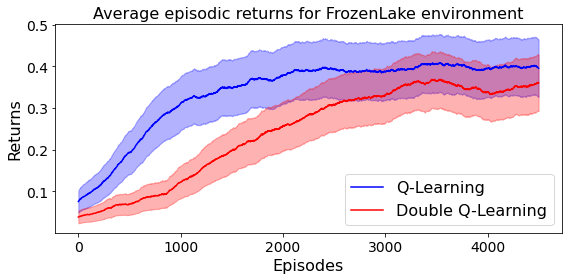

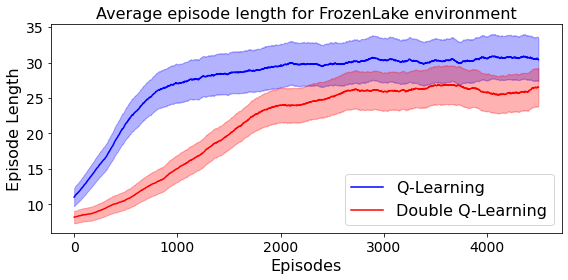

In [44]:
smoothing_radius = 5_00
confidence_band_scale=0.15

_ = plots.plot_values([
        (dict(label="Q-Learning", color="blue"), ep_returns_q_learning),
        (dict(label="Double Q-Learning", color="red"), ep_returns_dbl_q_learning),
    ],
    smoothing_radius=smoothing_radius,
    title="Average episodic returns for FrozenLake environment",
    confidence_band_scale=confidence_band_scale,
    legend=True,
    xlabel="Episodes", ylabel="Returns",
    savefig="../figs/frozenlake_average_episodic_returns.pdf",
)
_ = plots.plot_values([
        (dict(label="Q-Learning", color="blue"), ep_lengths_q_learning),
        (dict(label="Double Q-Learning", color="red"), ep_lengths_dbl_q_learning),
    ],
    smoothing_radius=smoothing_radius,
    title="Average episode length for FrozenLake environment",
    confidence_band_scale=confidence_band_scale,
    legend=True,
    xlabel="Episodes", ylabel="Episode Length",
    savefig="../figs/frozenlake_average_episode_length.pdf"
)